In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# Customize regions in a 2D mesh

Sometimes it's necessary to have more control over the size of the mesh in different regions. This notebook demonstrates how region markers can be used to do so.

Let's start with a simple line mesh:

<IPython.core.display.Javascript object>


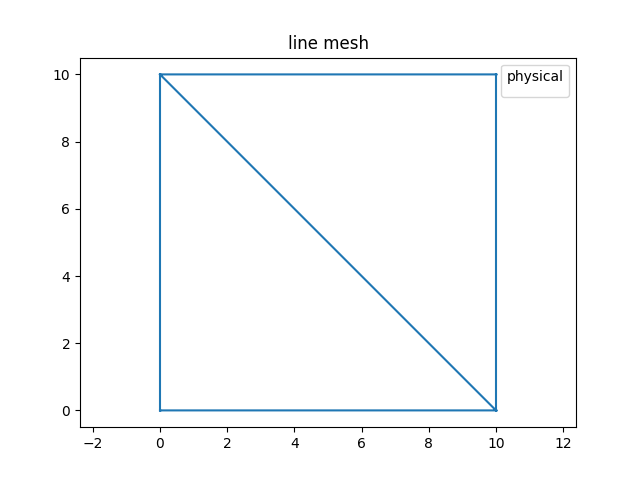

<AxesSubplot:title={'center':'line mesh'}>

In [2]:
from nanomesh import Mesh
import numpy as np

points = np.array([[0,0], [10,0], [10,10], [0,10]])
cells = np.array([[0,1], [1,2], [2,3], [3,0], [1,3]])

line_mesh = Mesh(points=points, cells=cells)
line_mesh.plot_mpl()

Region markers are used to identify regions in the line mesh. The cell below creates a marker in each of the triangles. The markers are given an integer label, and a point that should be somewhere inside the region (i.e. bounded by line segments).

Notice the options (`opts='pAa1'`) in order:

- `p`: [planar straight line graph](https://www.cs.cmu.edu/~quake/triangle.defs.html#pslg), tells the triangulator that each line segment can be divided by adding new points
- `A`: Propagate the label to each triangle in the region
- `a1`: Constrain the global triangle size to 1 px^2

For more info on the options (or switches):

- https://rufat.be/triangle/API.html#triangle.triangulate
- https://www.cs.cmu.edu/~quake/triangle.switch.html

<IPython.core.display.Javascript object>


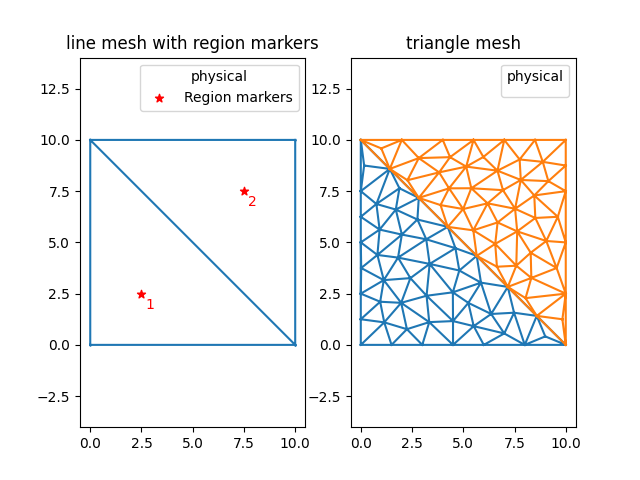

<AxesSubplot:title={'center':'triangle mesh'}>

In [3]:
import matplotlib.pyplot as plt
from nanomesh import RegionMarker

region_markers = [
    RegionMarker(label=1, point=(2.5, 2.5)),
    RegionMarker(label=2, point=(7.5, 7.5)),
]

line_mesh.region_markers.extend(region_markers)

fig, (ax0, ax1) = plt.subplots(ncols=2)

line_mesh.plot(ax=ax0)
ax0.set_title('line mesh with region markers')

mesh = line_mesh.triangulate(opts='pAa1')
mesh.plot(ax=ax1)

Region markers can be named by specifying the `name` attribute. Note that region names propagate to the `.field_data` attribute in the triangulated mesh, which means that they are available for the legend.

<IPython.core.display.Javascript object>


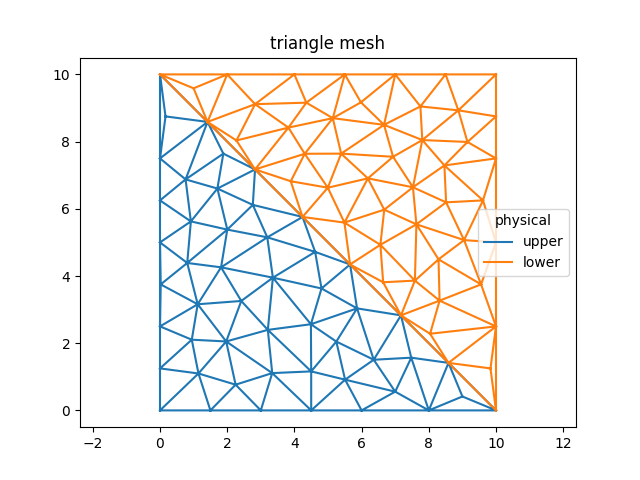

<AxesSubplot:title={'center':'triangle mesh'}>

In [4]:
region_markers = [
    RegionMarker(label=1, point=(2.5, 2.5), name='upper'),
    RegionMarker(label=2, point=(7.5, 7.5), name='lower'),
]

line_mesh.region_markers.clear()
line_mesh.region_markers.extend(region_markers)

mesh = line_mesh.triangulate(opts='pAa1')
mesh.plot()

The maximum triangle size can be limited by specifing the `constraint` attribute. Note that this requires `a` to be set, but not specified. The size of the triangles in the upper region be limited to 5 px^2, and the lower region to 0.5 px^2.

The last two examples also add `q30`, which tell `triangulate()` to make quality meshes, with a minimum triangle angles of 30 degrees.

<IPython.core.display.Javascript object>


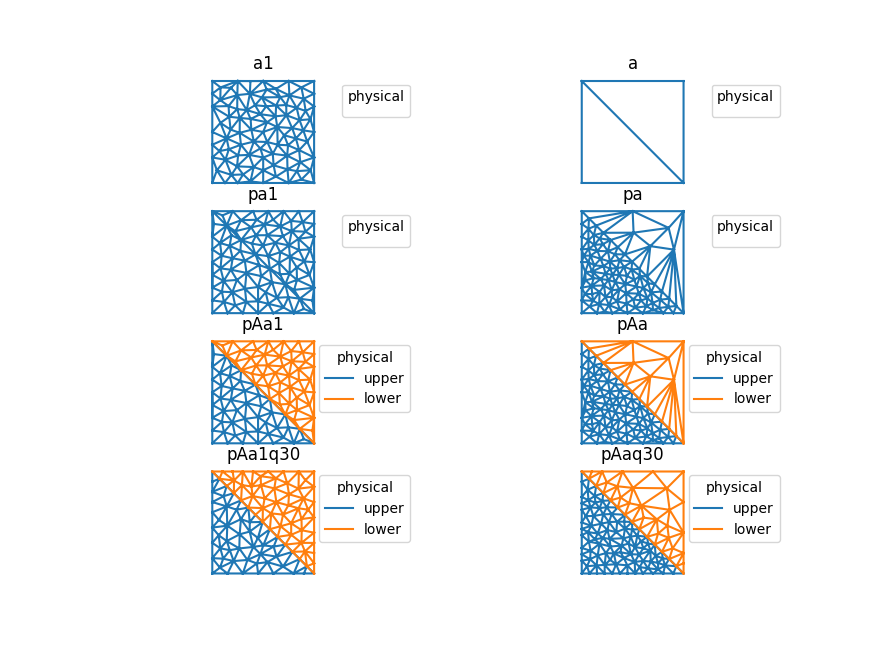

In [5]:
import matplotlib.pyplot as plt

region_markers = [
    RegionMarker(label=1, point=(2.5, 2.5), name='upper', constraint=0.5),
    RegionMarker(label=2, point=(7.5, 7.5), name='lower', constraint=5),
]

line_mesh.region_markers.clear()
line_mesh.region_markers.extend(region_markers)

fix, axes = plt.subplots(nrows=4, ncols=2)
axes = axes.flatten()

opts_tuple = (
    'a1',
    'a',
    'pa1',
    'pa',
    'pAa1',
    'pAa',
    'pAa1q30', 
    'pAaq30',
)

for ax, opts in zip(axes, opts_tuple):
    mesh = line_mesh.triangulate(opts=opts)
    ax = mesh.plot(ax=ax)
    ax.set_title(opts)
    ax.axis('off')

Region markers can be accessed/modified through the `.region_markers` attribute. 

In [6]:
line_mesh.region_markers

RegionMarkerList(
    RegionMarker(label=1, point=(2.5, 2.5), name='upper', constraint=0.5),
    RegionMarker(label=2, point=(7.5, 7.5), name='lower', constraint=5)
)